In [2]:
using Revise
using BilevelTrajOpt

using RigidBodyDynamics
using Plots
gr(size=(500,500), html_output_format=:png);

In [3]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
velocity_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [5]:
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 5

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] .= 0.;

In [13]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
 15.564150 seconds (24.36 M allocations: 1.082 GiB, 5.81% gc time)
  0.001064 seconds (1.76 k allocations: 275.188 KiB)
  0.001288 seconds (1.76 k allocations: 275.188 KiB)
  0.001136 seconds (1.76 k allocations: 275.188 KiB)
  0.001478 seconds (1.76 k allocations: 275.188 KiB)
  0.002043 seconds (1.76 k allocations: 275.188 KiB)
  0.000794 seconds (1.76 k allocations: 275.188 KiB)
  0.000636 seconds (1.76 k allocations: 275.188 KiB)
  0.001274 seconds (1.76 k allocations: 275.188 KiB)
  0.000698 seconds (1.76 k allocations: 275.188 KiB)
  0.001002 seconds (1.76 k allocations: 275.188 KiB)
  0.001336 seconds (1.76 k allocations: 275.188 KiB)
  0.000955 seconds (1.76 k allocations: 275.188 KiB)
  0.000653 seconds (1.76 k allocations: 275.188 KiB)
  0.000829 seconds (1.76 k allocations: 275.188 KiB)
  0.000649 seconds (1.76 k allocations: 275.188 KiB)
  0.000653 seconds (1.76 k allocations: 275.188 KiB)
  0.012302 seconds (1.76 k allocations: 275.188 KiB, 91.49% gc time

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

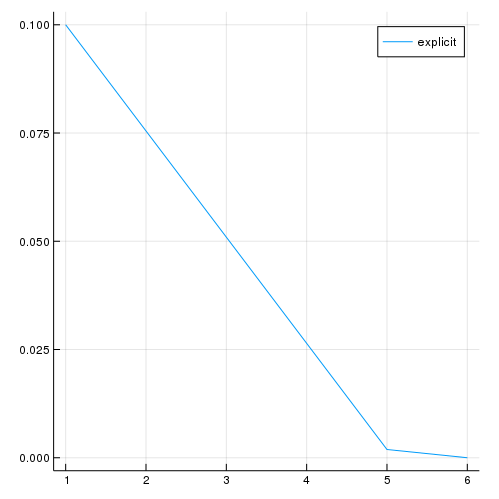

In [12]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
# plot!(traj_imp[j,:],label="implicit")